# NHANES: Exploratory Data Analysis (EDA)
This notebook covers the full exploratory data analysis of the cleaned NHANES dataset. The goal is to understand variable distributions and uncover relationships related to diabetes and hypertension.

## Setup
First, we'll import the necessary libraries, load our cleaned dataset (`df`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/NHANES_cleaned.csv')
df.head()

,Respondent Sequence Number (ID),"Gender of the participant (1=Male, 2=Female)",Age in years (Top-coded at 80),Race/Hispanic origin category,Highest level of education attained,Ratio of family income to poverty,Weight (kg),Standing Height (cm),Body Mass Index (BMI: kg/m^2),"Systolic Blood Pressure, 1st reading (mmHg)","Diastolic Blood Pressure, 1st reading (mmHg)",Ever told by doctor they had Diabetes?,Currently taking diabetic Pills to lower blood sugar?,Glycohemoglobin (HbA1c) value (%),Ever smoked at least 100 cigarettes in life?,"Currently Smoke? (Every day, some days, or not at all)",Drank alcohol in the past 12 months?,AHA_Category,ESH_Category,Diabetes_Status
0,130378.0,Male,43.0,Non-Hispanic Asian,College graduate or above,5.00,86.9,179.5,27.0,135.0,98.0,No,No,5.6,Yes,Not at all,Not provided,Hypertension Stage 2,Grade 1 Hypertension,Normal
1,130379.0,Male,66.0,Non-Hispanic White,College graduate or above,5.00,101.8,174.2,33.5,121.0,84.0,No,No,5.6,Yes,Not at all,Yes,Hypertension Stage 1,Normal,Normal
2,130380.0,Female,44.0,Other Hispanic,High school graduate/GED or equivalent,1.41,69.4,152.9,29.7,111.0,79.0,Yes,Yes,6.2,No,Not at all,Yes,Normal,Optimal,Prediabetes
3,130386.0,Male,34.0,Mexican American,Some college or AA degree,1.33,90.6,173.3,30.2,110.0,72.0,No,No,5.1,Yes,Not at all,Yes,Normal,Optimal,Normal
4,130387.0,Female,68.0,Non-Hispanic White,College graduate or above,1.32,103.5,155.9,42.6,143.0,76.0,No,No,5.9,No,Not at all,Yes,Hypertension Stage 2,Grade 1 Hypertension,Prediabetes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57395 entries, 0 to 57394
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Respondent Sequence Number (ID)                         57395 non-null  float64
 1   Gender of the participant (1=Male, 2=Female)            57395 non-null  object 
 2   Age in years (Top-coded at 80)                          57395 non-null  float64
 3   Race/Hispanic origin category                           57395 non-null  object 
 4   Highest level of education attained                     57395 non-null  object 
 5   Ratio of family income to poverty                       57395 non-null  float64
 6   Weight (kg)                                             57395 non-null  float64
 7   Standing Height (cm)                                    57395 non-null  float64
 8   Body Mass Index (BMI: kg/m^2)       

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Respondent Sequence Number (ID),57395.0,NaN,NaN,NaN,100827.628975,25545.916884,62161.0,78149.5,92498.0,122406.5,142310.0
"Gender of the participant (1=Male, 2=Female)",57395,2,Female,29348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age in years (Top-coded at 80),57395.0,NaN,NaN,NaN,33.575468,25.135599,0.0,10.0,30.0,56.0,80.0
Race/Hispanic origin category,57395,6,Non-Hispanic White,21201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highest level of education attained,57395,8,Not provided,23321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratio of family income to poverty,57395.0,NaN,NaN,NaN,2.321917,1.546848,0.0,1.07,1.92,3.48,5.0
Weight (kg),57395.0,NaN,NaN,NaN,64.804195,30.578025,2.7,47.8,67.2,82.8,254.3
Standing Height (cm),57395.0,NaN,NaN,NaN,157.41327,20.802403,78.3,154.0,162.2,169.4,204.5
Body Mass Index (BMI: kg/m^2),57395.0,NaN,NaN,NaN,26.089145,7.419034,11.1,21.4,25.4,29.5,92.3
"Systolic Blood Pressure, 1st reading (mmHg)",57395.0,NaN,NaN,NaN,118.356582,15.66268,52.0,111.0,116.0,122.0,238.0


## Univariate Analysis (Understanding Each Variable)
We will first analyze each variable on its own to understand its distribution, frequency, and potential outliers.

### Numerical Variables
Plotting histograms and box plots for `Age`, `BMI`, `HbA1c`, `Systolic Blood Pressure`, and `Ratio of family income`.

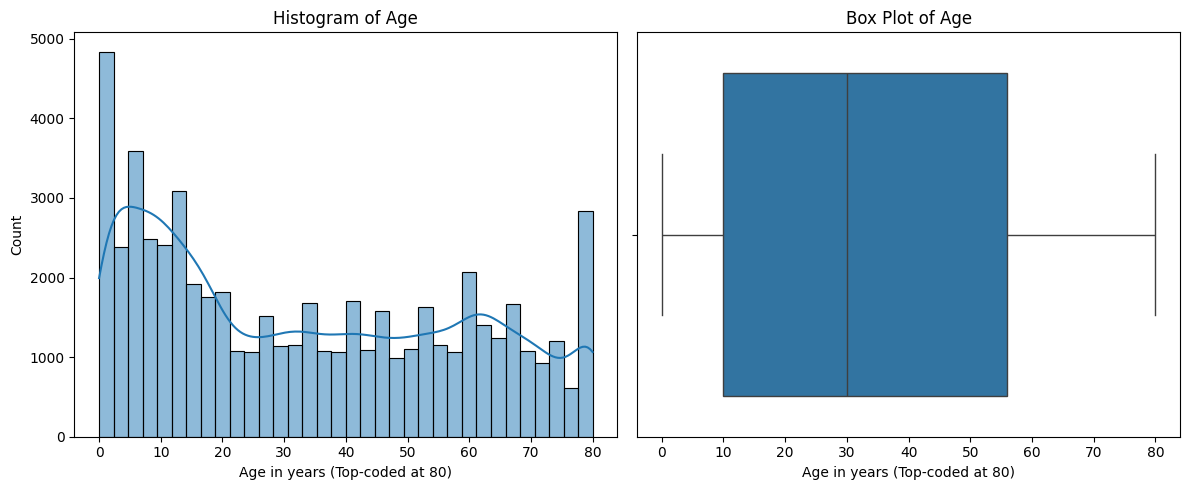

Displayed Univariate Numerical plot for Age


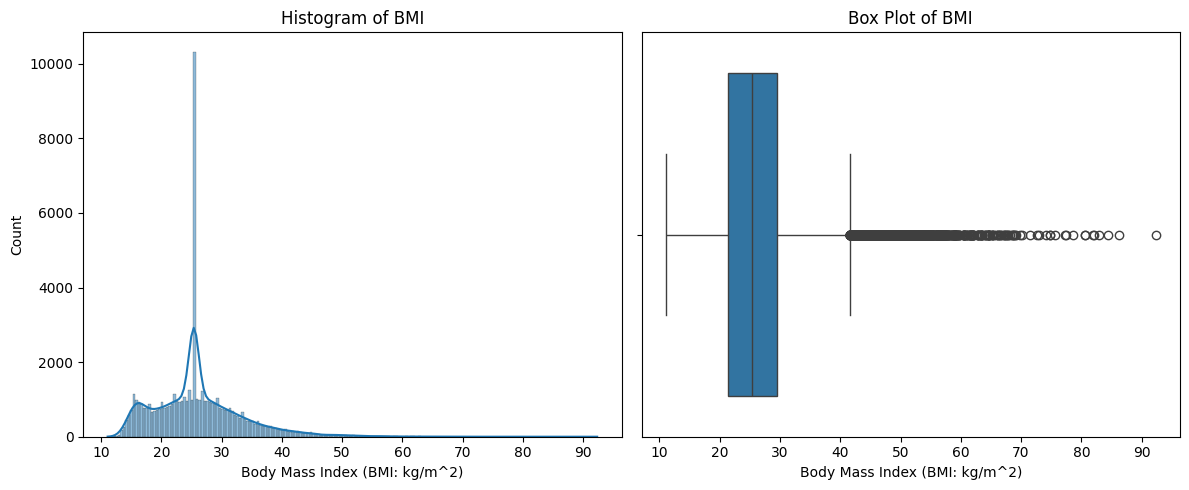

Displayed Univariate Numerical plot for BMI


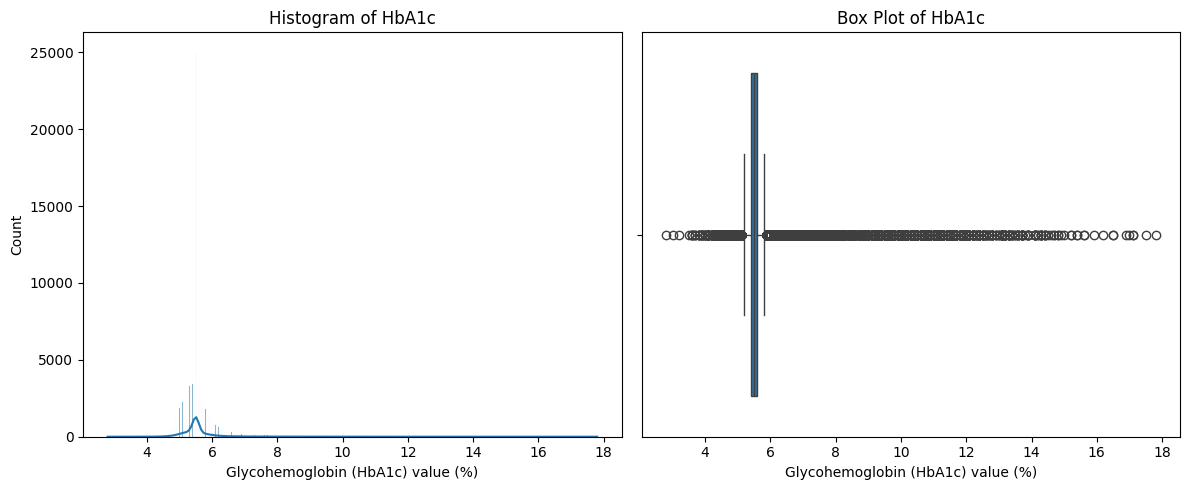

Displayed Univariate Numerical plot for HbA1c


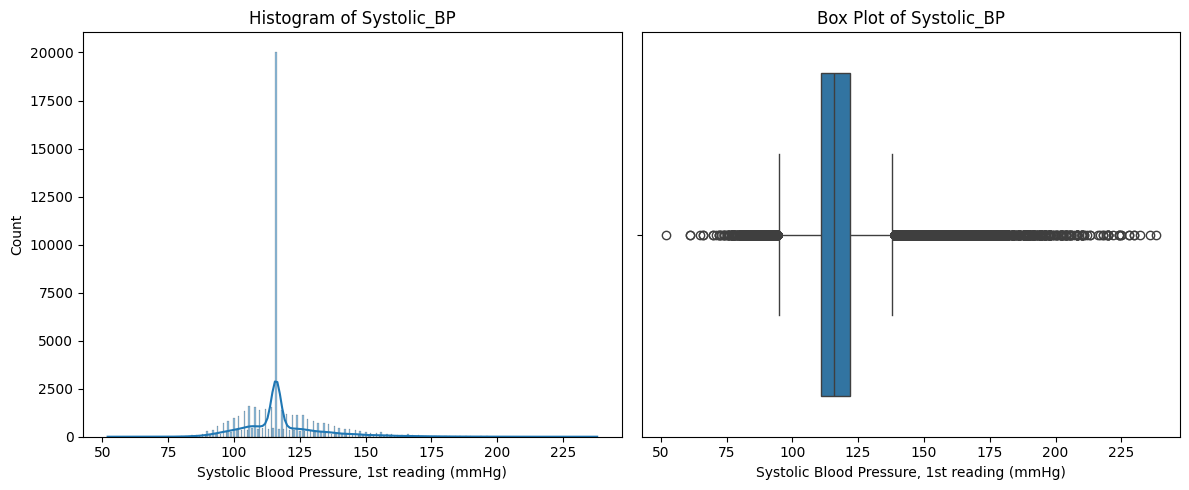

Displayed Univariate Numerical plot for Systolic_BP


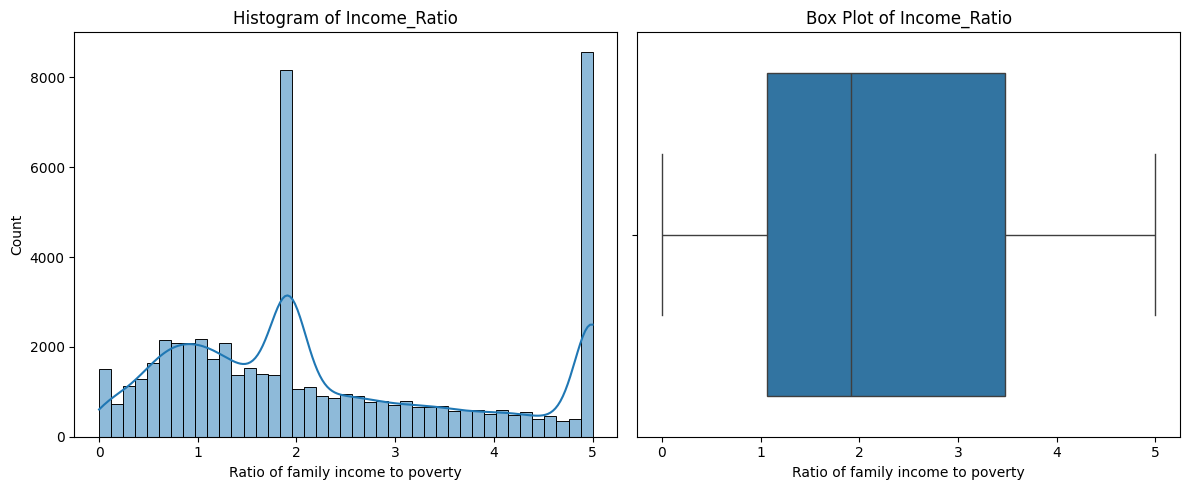

Displayed Univariate Numerical plot for Income_Ratio


In [5]:
numerical_cols = {
    'Age': 'Age in years (Top-coded at 80)',
    'BMI': 'Body Mass Index (BMI: kg/m^2)',
    'HbA1c': 'Glycohemoglobin (HbA1c) value (%)',
    'Systolic_BP': 'Systolic Blood Pressure, 1st reading (mmHg)',
    'Income_Ratio': 'Ratio of family income to poverty'
}

for short_name, long_name in numerical_cols.items():
    if long_name in df.columns:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[long_name], kde=True)
        plt.title(f'Histogram of {short_name}')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[long_name])
        plt.title(f'Box Plot of {short_name}')

        plt.tight_layout()
        plt.show()
        print(f"Displayed Univariate Numerical plot for {short_name}")
    else:
        print(f"Warning: Column '{long_name}' not found for Univariate Numerical plot.")

### Categorical Variables
Plotting count plots (bar charts) to understand the frequency of each category for our target variables and key features.

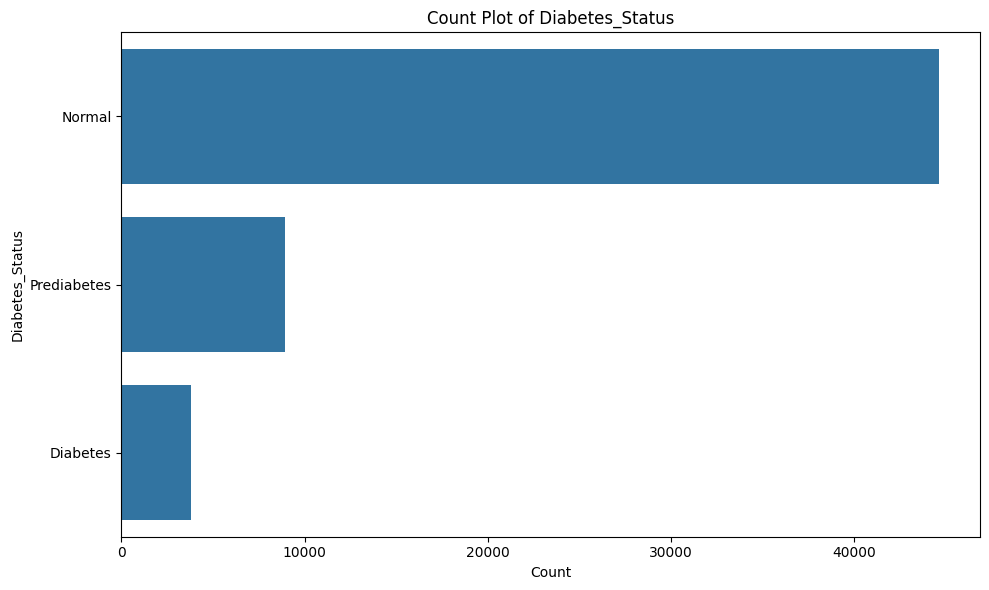

Displayed Univariate Categorical plot for Diabetes_Status


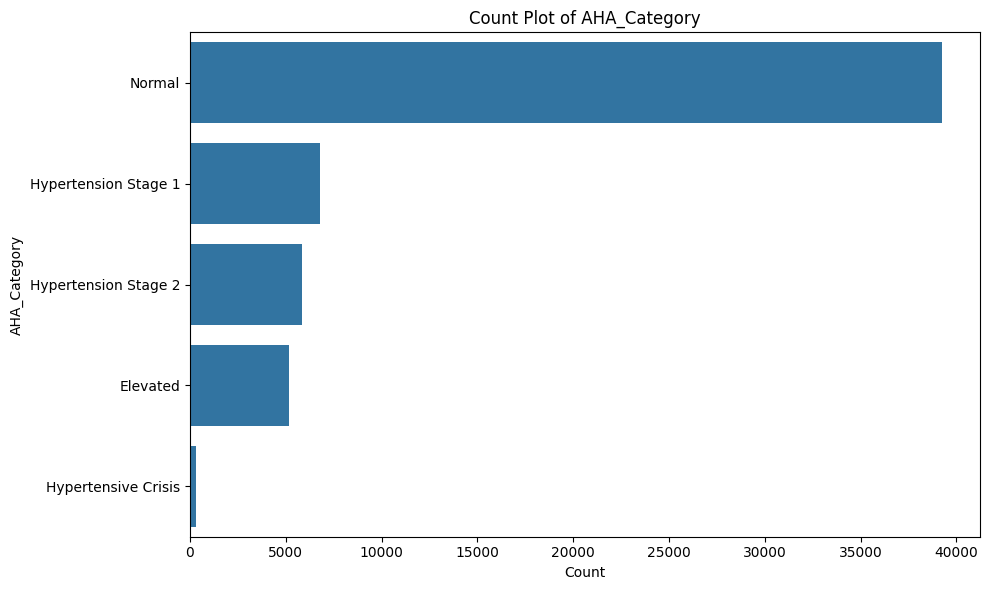

Displayed Univariate Categorical plot for AHA_Category


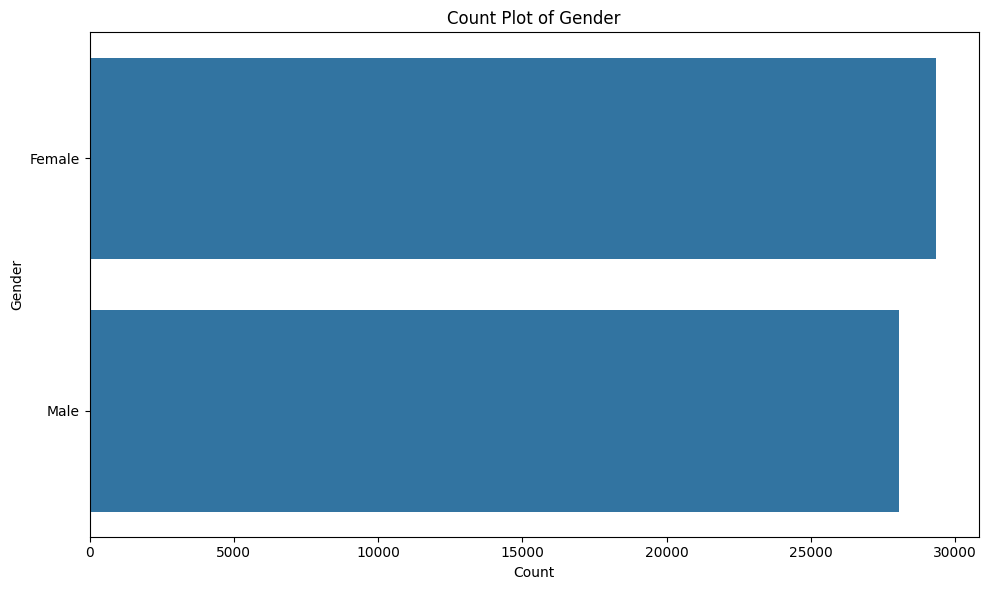

Displayed Univariate Categorical plot for Gender


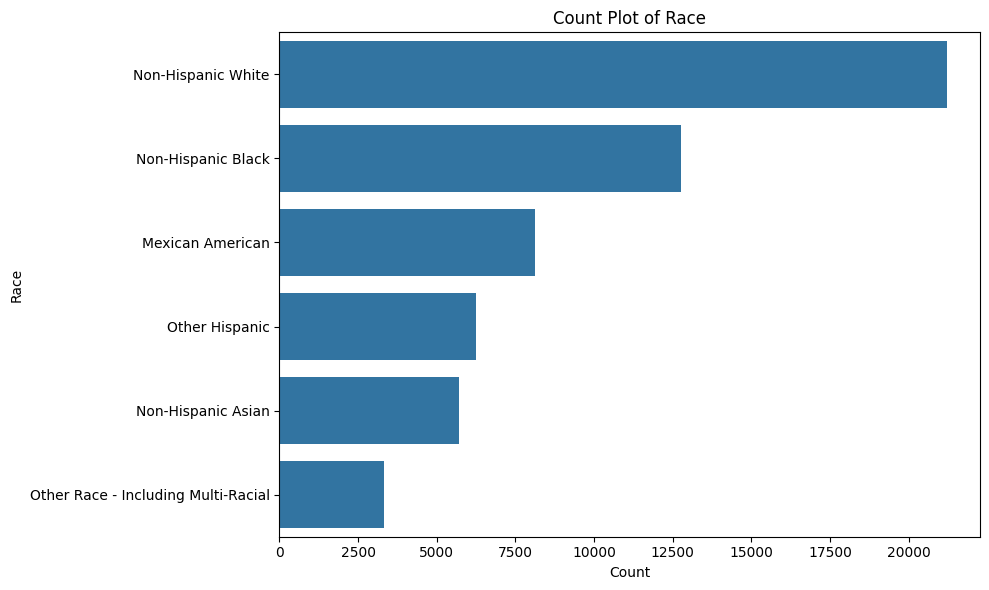

Displayed Univariate Categorical plot for Race


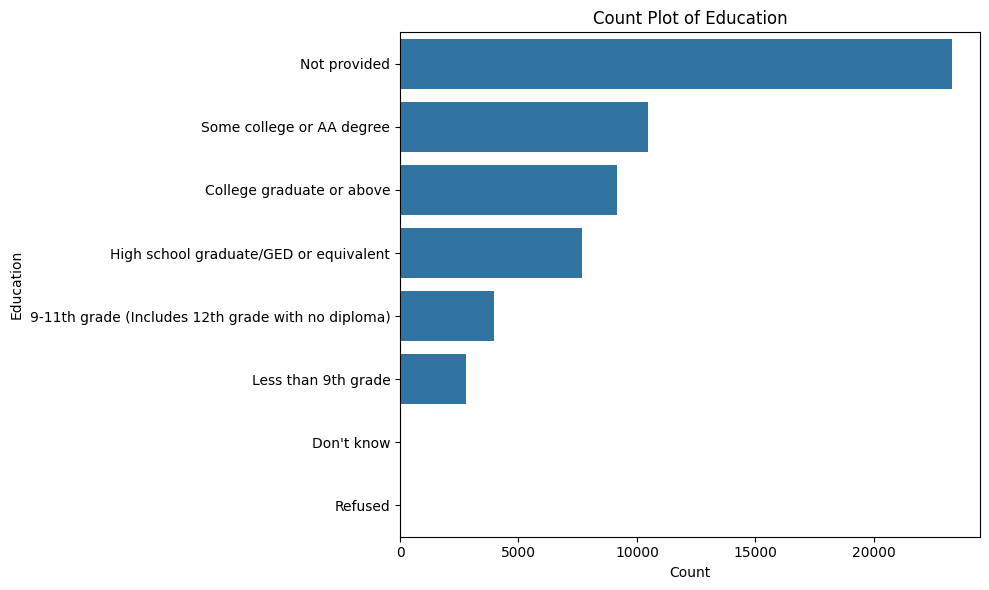

Displayed Univariate Categorical plot for Education


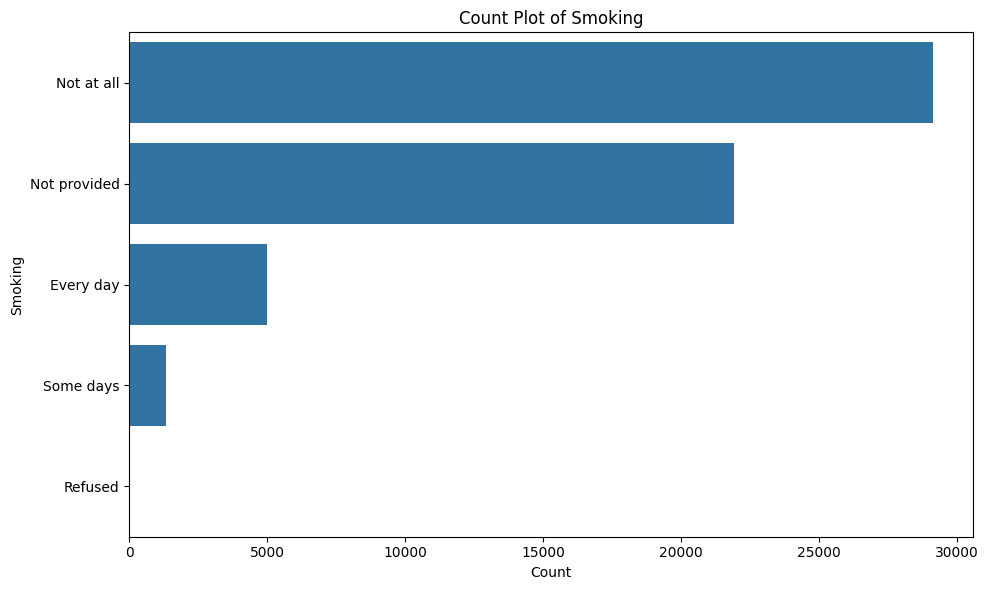

Displayed Univariate Categorical plot for Smoking


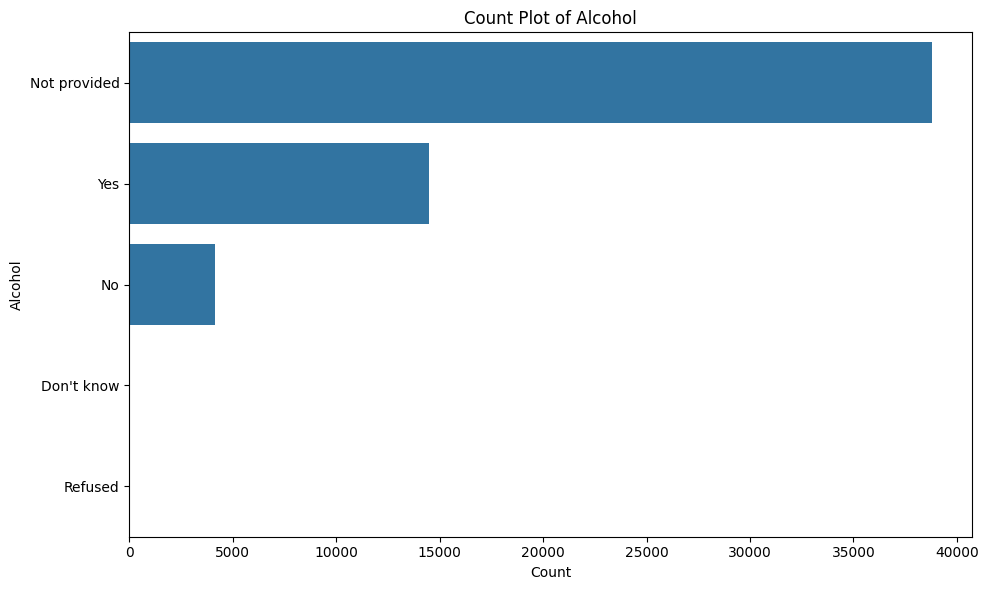

Displayed Univariate Categorical plot for Alcohol


In [6]:
categorical_cols = {
    'Diabetes_Status': 'Diabetes_Status',
    'AHA_Category': 'AHA_Category',
    'Gender': 'Gender of the participant (1=Male, 2=Female)',
    'Race': 'Race/Hispanic origin category',
    'Education': 'Highest level of education attained',
    'Smoking': 'Currently Smoke? (Every day, some days, or not at all)',
    'Alcohol': 'Drank alcohol in the past 12 months?'
}

for short_name, long_name in categorical_cols.items():
    if long_name in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[long_name], order=df[long_name].value_counts().index)
        plt.title(f'Count Plot of {short_name}')
        plt.xlabel('Count')
        plt.ylabel(short_name)
        plt.tight_layout()

        plt.show()
        print(f"Displayed Univariate Categorical plot for {short_name}")
    else:
        print(f"Warning: Column '{long_name}' not found for Univariate Categorical plot.")

## Bivariate & Multivariate Analysis (Finding Relationships)
Now we explore the core of the analysis: how key variables interact with our main targets.
### 🎯 Analysis 1: Risk Factors for Diabetes (`Diabetes_Status`)
Investigating which factors have the strongest correlation with a `Normal`, `Prediabetes`, or `Diabetes` status.

#### Q1: How do numerical factors affect diabetes risk?
* `Age` vs. `Diabetes_Status` (Box plot)
* `BMI` vs. `Diabetes_Status` (Box plot)
* `Ratio of family income to poverty` vs. `Diabetes_Status` (Violin plot)

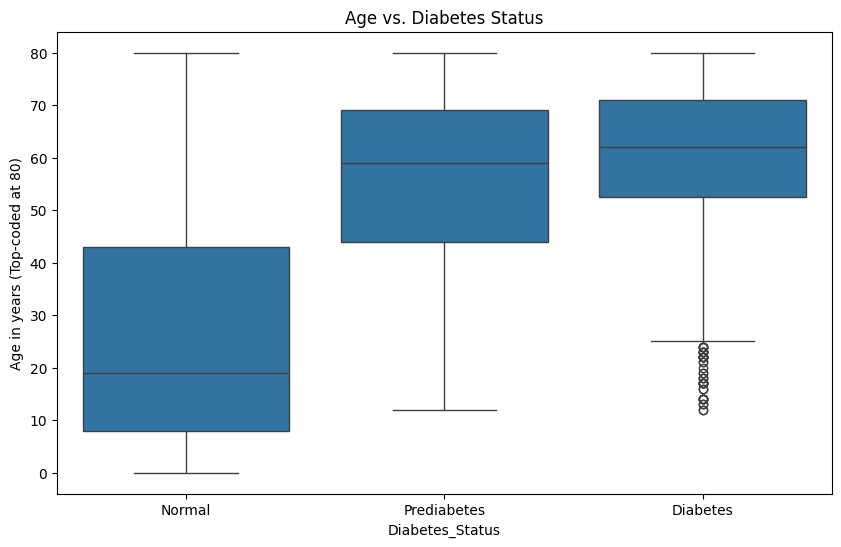

Displayed plot: Age vs. Diabetes


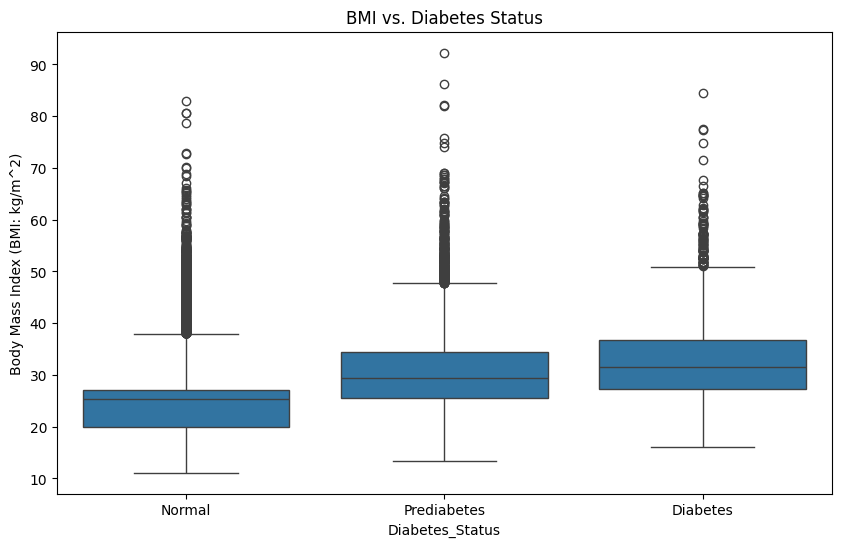

Displayed plot: BMI vs. Diabetes


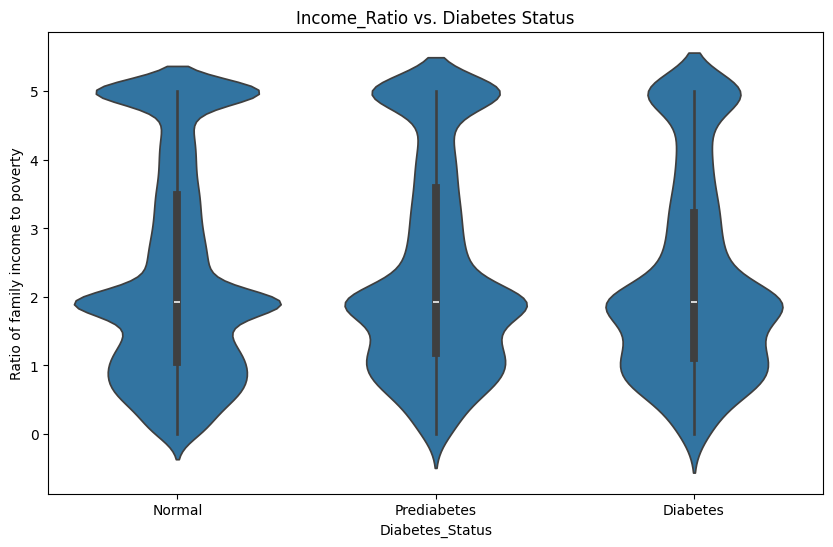

Displayed plot: Income_Ratio vs. Diabetes


In [7]:
num_vs_diabetes_cols = {
    'Age': 'Age in years (Top-coded at 80)',
    'BMI': 'Body Mass Index (BMI: kg/m^2)',
    'Income_Ratio': 'Ratio of family income to poverty'
}
target_diabetes = 'Diabetes_Status'

if target_diabetes in df.columns:
    for short_name, long_name in num_vs_diabetes_cols.items():
        if long_name in df.columns:
            plt.figure(figsize=(10, 6))

            if short_name == 'Income_Ratio':
                sns.violinplot(x=df[target_diabetes], y=df[long_name])
            else:
                sns.boxplot(x=df[target_diabetes], y=df[long_name])

            plt.title(f'{short_name} vs. Diabetes Status')
            plt.show()
            print(f"Displayed plot: {short_name} vs. Diabetes")
        else:
            print(f"Warning: Column '{long_name}' not found for Diabetes Bivariate plot.")
else:
    print(f"Warning: Target column '{target_diabetes}' not found. Skipping Diabetes Bivariate Analysis.")

#### Q2: How do categorical factors affect diabetes risk?
* `Race` vs. `Diabetes_Status` (Stacked bar chart)
* `Education Level` vs. `Diabetes_Status` (Stacked bar chart)
* `Smoking Status` vs. `Diabetes_Status` (Stacked bar chart)

In [8]:
cat_vs_diabetes_cols = {
    'Race': 'Race/Hispanic origin category',
    'Education': 'Highest level of education attained',
    'Smoking': 'Currently Smoke? (Every day, some days, or not at all)'
}

if target_diabetes in df.columns:
    for short_name, long_name in cat_vs_diabetes_cols.items():
        if long_name in df.columns:
            data = df.groupby(long_name)[target_diabetes].value_counts(normalize=True).mul(100).rename('percent').reset_index()

            chart = alt.Chart(data).mark_bar().encode(
                x=alt.X(long_name, title=short_name),
                y=alt.Y('percent', axis=alt.Axis(title='Percent (%)')),
                color=alt.Color(target_diabetes),
                tooltip=[long_name, target_diabetes, alt.Tooltip('percent', format='.1f')]
            ).properties(
                title=f'{short_name} vs. Diabetes Status'
            ).interactive()

            display(chart)
            print(f"Displayed plot: {short_name} vs. Diabetes")
        else:
            print(f"Warning: Column '{long_name}' not found for Diabetes Bivariate plot.")
else:
    print(f"Warning: Target column '{target_diabetes}' not found. Skipping Diabetes Stacked Bars.")

alt.Chart(...)

Displayed plot: Race vs. Diabetes


alt.Chart(...)

Displayed plot: Education vs. Diabetes


alt.Chart(...)

Displayed plot: Smoking vs. Diabetes


#### Q3: How does hypertension correlate with diabetes?
Creating a cross-tabulation (heatmap) between `Diabetes_Status` and `AHA_Category` to visualize comorbidity (the overlap between the two conditions).

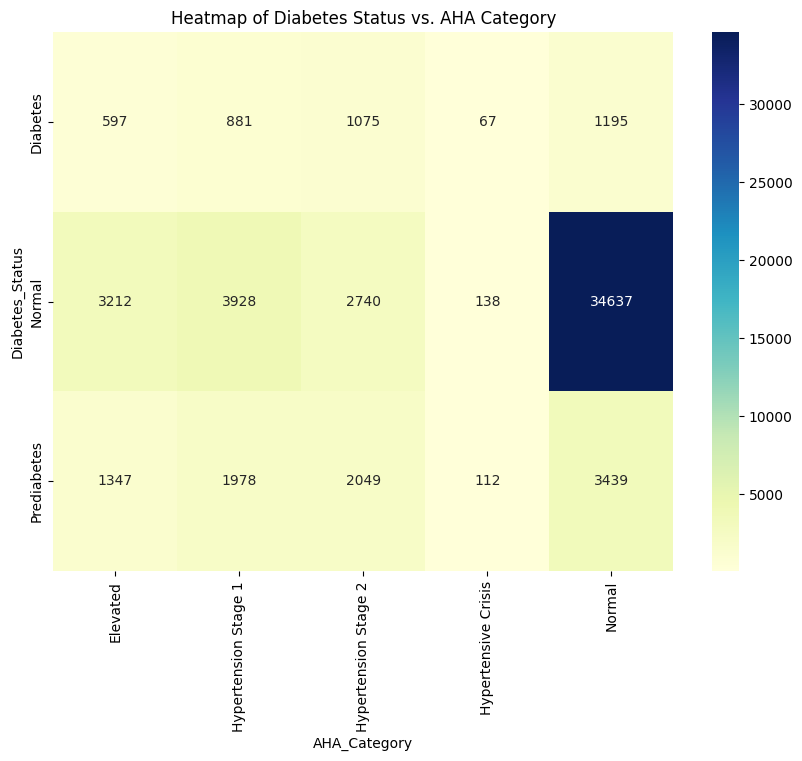

Displayed Heatmap: Diabetes vs. AHA Category


In [9]:
if 'AHA_Category' in df.columns and target_diabetes in df.columns:
    crosstab = pd.crosstab(df[target_diabetes], df['AHA_Category'])
    plt.figure(figsize=(10, 7))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Heatmap of Diabetes Status vs. AHA Category')
    plt.show()
    print("Displayed Heatmap: Diabetes vs. AHA Category")
else:
    print("Warning: Column 'AHA_Category' or '{target_diabetes}' not found for Heatmap.")

### 🎯 Analysis 2: Risk Factors for Hypertension (`AHA_Category`)
Investigating which factors have the strongest correlation with the different stages of hypertension.

#### Q1: How do numerical factors affect hypertension risk?
* `Age` vs. `AHA_Category` (Box plot)
* `BMI` vs. `AHA_Category` (Box plot)
* `HbA1c` vs. `AHA_Category` (Box plot)

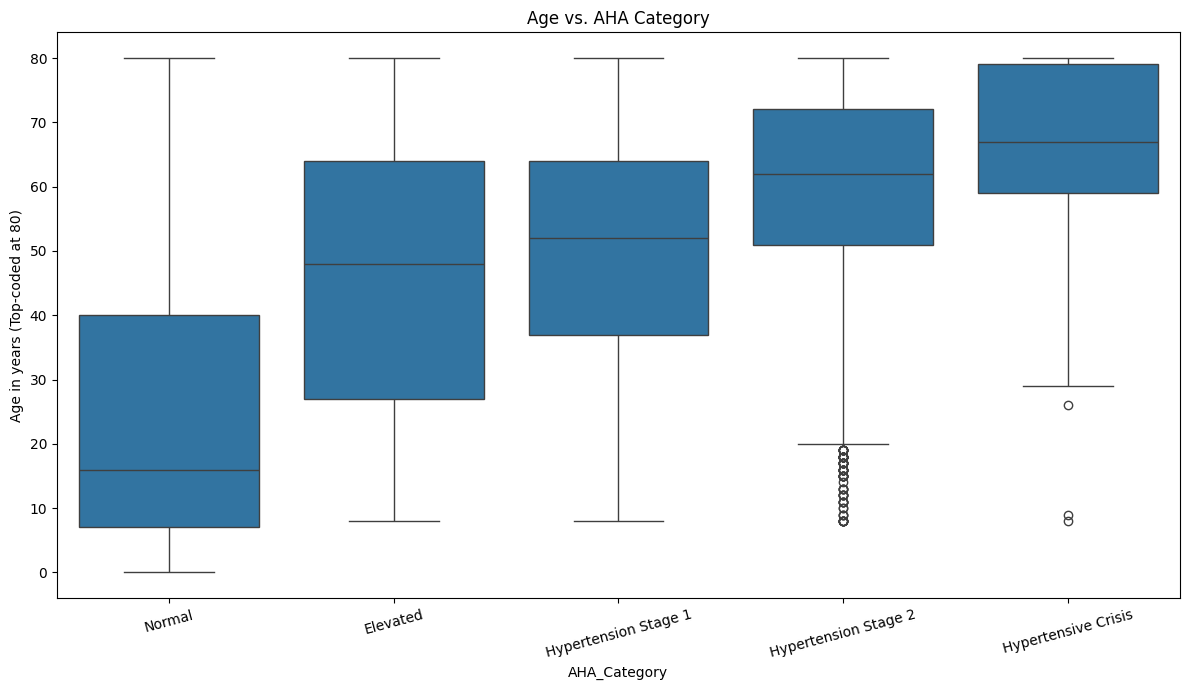

Displayed plot: Age vs. AHA Category


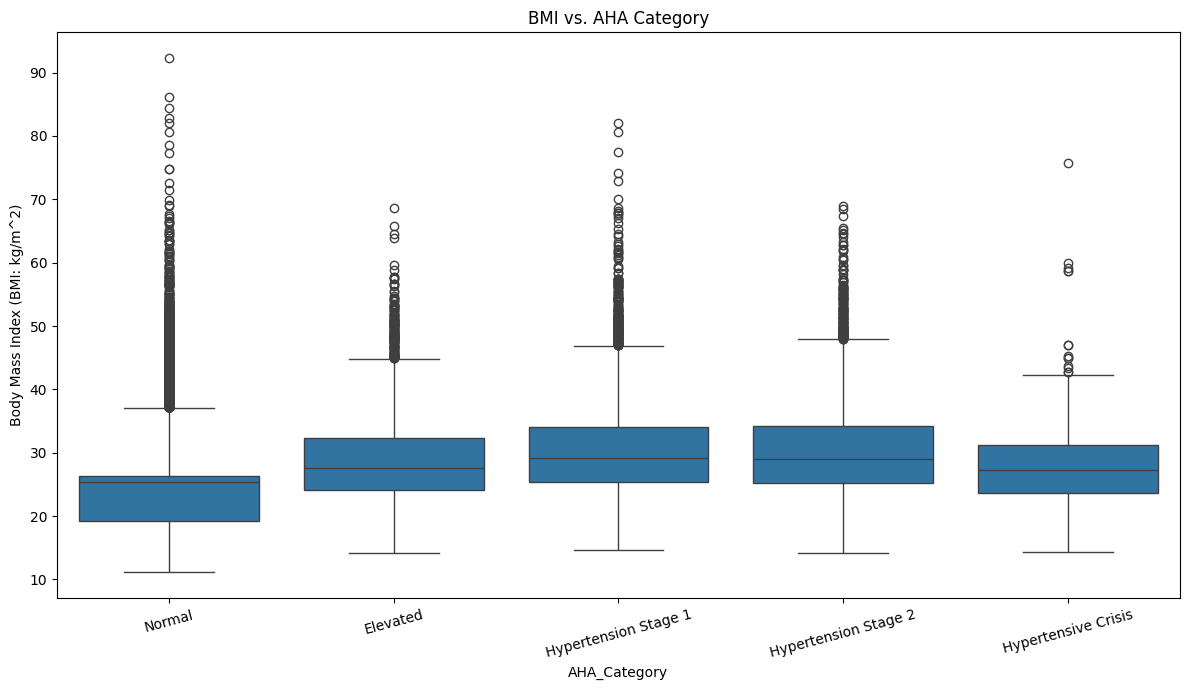

Displayed plot: BMI vs. AHA Category


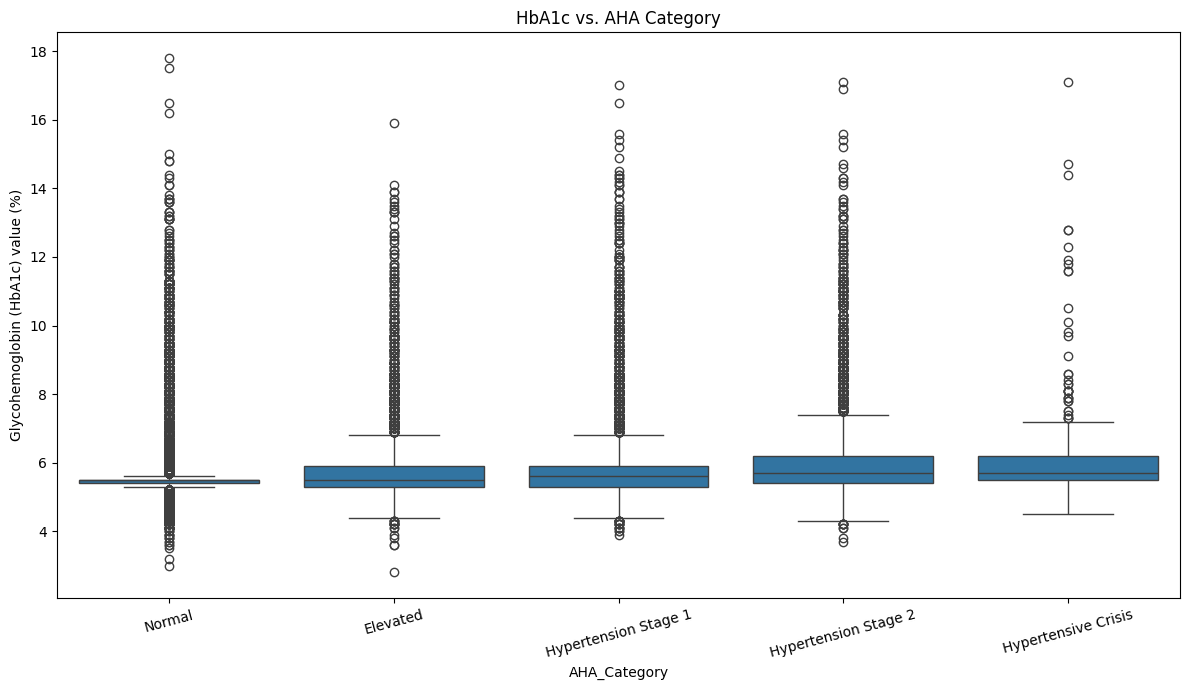

Displayed plot: HbA1c vs. AHA Category


In [10]:
num_vs_aha_cols = {
    'Age': 'Age in years (Top-coded at 80)',
    'BMI': 'Body Mass Index (BMI: kg/m^2)',
    'HbA1c': 'Glycohemoglobin (HbA1c) value (%)'
}
target_aha = 'AHA_Category'

if target_aha in df.columns:
    for short_name, long_name in num_vs_aha_cols.items():
        if long_name in df.columns:
            plt.figure(figsize=(12, 7))
            sns.boxplot(x=df[target_aha], y=df[long_name], order=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'])
            plt.title(f'{short_name} vs. AHA Category')
            plt.xticks(rotation=15)
            plt.tight_layout()

            plt.show()
            print(f"Displayed plot: {short_name} vs. AHA Category")
        else:
            print(f"Warning: Column '{long_name}' not found for Hypertension Bivariate plot.")
else:
    print(f"Warning: Target column '{target_aha}' not found. Skipping Hypertension Bivariate Analysis.")

#### Q2: How do categorical factors affect hypertension risk?
* `Race` vs. `AHA_Category` (Stacked bar chart)
* `Smoking Status` vs. `AHA_Category` (Stacked bar chart)
* `Alcohol Use` vs. `AHA_Category` (Stacked bar chart)

In [11]:
cat_vs_aha_cols = {
    'Race': 'Race/Hispanic origin category',
    'Smoking': 'Currently Smoke? (Every day, some days, or not at all)',
    'Alcohol': 'Drank alcohol in the past 12 months?'
}

if target_aha in df.columns:
    for short_name, long_name in cat_vs_aha_cols.items():
        if long_name in df.columns:
            data = df.groupby(long_name)[target_aha].value_counts(normalize=True).mul(100).rename('percent').reset_index()

            chart = alt.Chart(data).mark_bar().encode(
                x=alt.X(long_name, title=short_name),
                y=alt.Y('percent', axis=alt.Axis(title='Percent (%)')),
                color=alt.Color(target_aha),
                tooltip=[long_name, target_aha, alt.Tooltip('percent', format='.1f')]
            ).properties(
                title=f'{short_name} vs. AHA Category'
            ).interactive()

            display(chart)
            print(f"Displayed plot: {short_name} vs. AHA Category")
        else:
            print(f"Warning: Column '{long_name}' not found for Hypertension Bivariate plot.")
else:
    print(f"Warning: Target column '{target_aha}' not found. Skipping Hypertension Stacked Bars.")

alt.Chart(...)

Displayed plot: Race vs. AHA Category


alt.Chart(...)

Displayed plot: Smoking vs. AHA Category


alt.Chart(...)

Displayed plot: Alcohol vs. AHA Category


### Multivariate Analysis: Correlation Heatmap
Before diving into specific bivariate relationships, let's get a high-level overview of how all numerical variables correlate with each other. A heatmap is perfect for visualizing the correlation matrix.

* Values close to **+1.0** (dark red/blue) mean a strong **positive** correlation.
* Values close to **-1.0** (dark red/blue) mean a strong **negative** correlation.
* Values close to **0.0** (light color) mean **no linear** correlation.

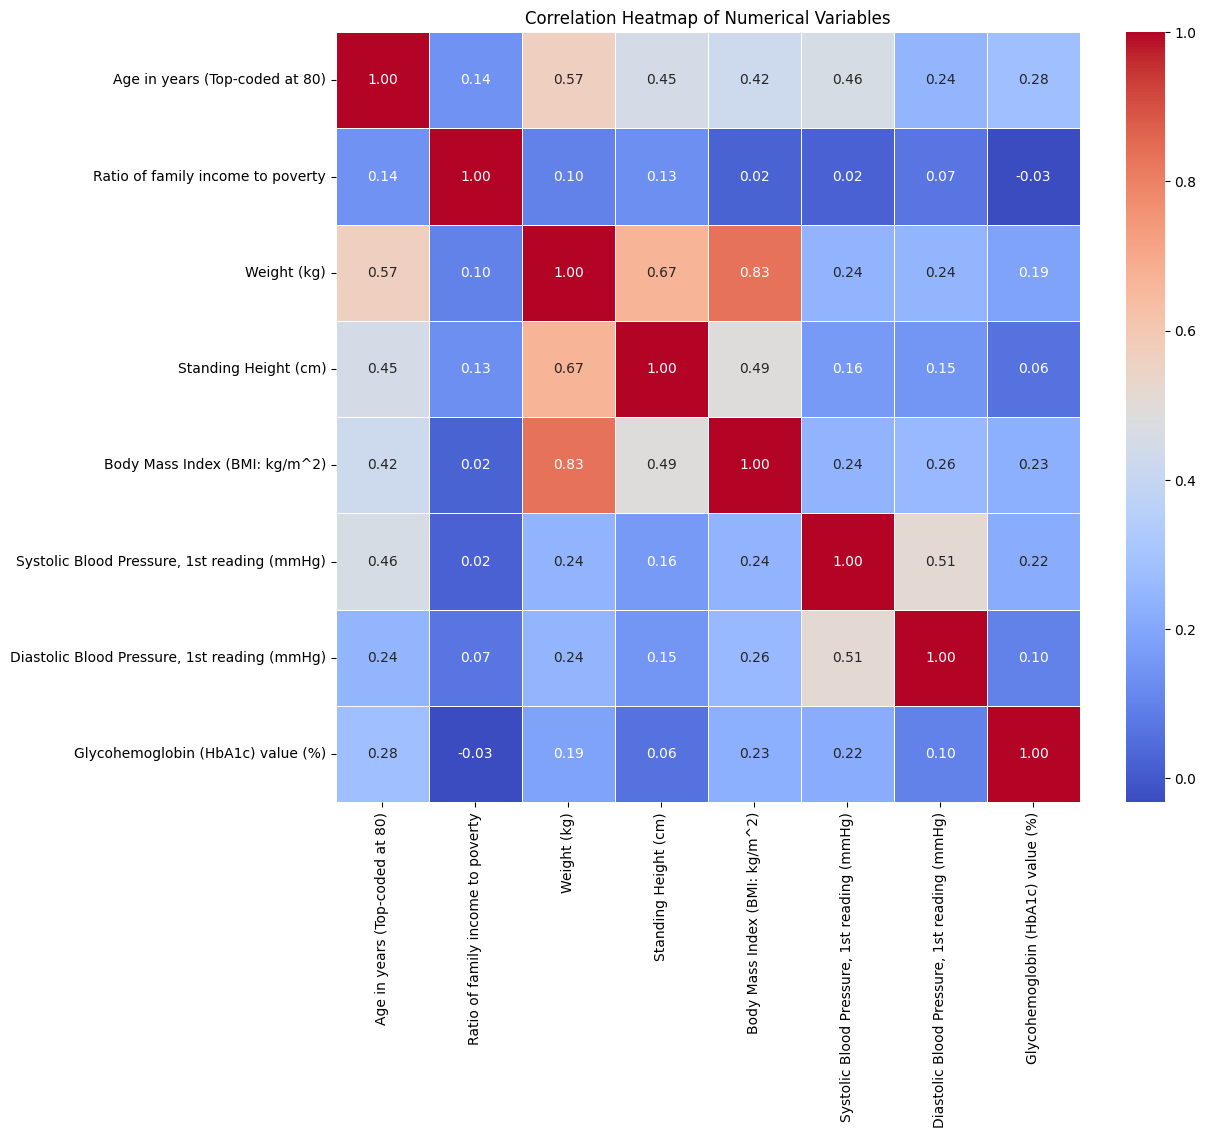

Displayed Correlation Heatmap


In [12]:
numerical_cols_for_corr = [
    'Age in years (Top-coded at 80)',
    'Ratio of family income to poverty',
    'Weight (kg)',
    'Standing Height (cm)',
    'Body Mass Index (BMI: kg/m^2)',
    'Systolic Blood Pressure, 1st reading (mmHg)',
    'Diastolic Blood Pressure, 1st reading (mmHg)',
    'Glycohemoglobin (HbA1c) value (%)'
]

existing_cols_for_corr = [col for col in numerical_cols_for_corr if col in df.columns]

if existing_cols_for_corr:
    corr_matrix = df[existing_cols_for_corr].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=.5
    )
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()
    print("Displayed Correlation Heatmap")
else:
    print("Warning: No numerical columns found for correlation heatmap.")

## Statistical Feature Significance
To quickly identify the most important predictors, we will run statistical tests for all features against our target variable, `Diabetes_Status`.

* **Chi-Square Test:** Used for `Categorical Features` (e.g., `Race`, `Smoking`).
* **ANOVA Test:** Used for `Numerical Features` (e.g., `Age`, `BMI`).

The results will be combined into a single summary table, sorted by `p-value` to rank feature importance.

In [13]:
from scipy.stats import chi2_contingency, f_oneway

target_col = 'Diabetes_Status'

categorical_features = [
    'Gender of the participant (1=Male, 2=Female)',
    'Race/Hispanic origin category',
    'Highest level of education attained',
    'Ever told by doctor they had Diabetes?',
    'Currently taking diabetic Pills to lower blood sugar?',
    'Ever smoked at least 100 cigarettes in life?',
    'Currently Smoke? (Every day, some days, or not at all)',
    'Drank alcohol in the past 12 months?',
    'AHA_Category',
    'ESH_Category'
]

numerical_features = [
    'Age in years (Top-coded at 80)',
    'Ratio of family income to poverty',
    'Weight (kg)',
    'Standing Height (cm)',
    'Body Mass Index (BMI: kg/m^2)',
    'Systolic Blood Pressure, 1st reading (mmHg)',
    'Diastolic Blood Pressure, 1st reading (mmHg)',
    'Glycohemoglobin (HbA1c) value (%)'
]

chi2_results_list = []
for feature in categorical_features:
    if feature in df.columns and target_col in df.columns:
        crosstab = pd.crosstab(df[feature], df[target_col])
        chi2, p_value, dof, expected_freq = chi2_contingency(crosstab)
        chi2_results_list.append([feature, p_value, 'Chi-Square (Categorical)'])
    else:
        print(f"Warning: Skipping Chi-Square for missing column: {feature}")

df_chi2_results = pd.DataFrame(
    chi2_results_list,
    columns=['Feature', 'P-value', 'Test_Type']
)

anova_results_list = []
target_groups = df[target_col].unique()

for feature in numerical_features:
    if feature in df.columns and target_col in df.columns:
        groups = []
        for group_name in target_groups:
            group_data = df[df[target_col] == group_name][feature]
            if not group_data.empty:
                groups.append(group_data)

        if len(groups) > 1:
            f_stat, p_value = f_oneway(*groups)
            anova_results_list.append([feature, p_value, 'ANOVA (Numerical)'])
    else:
        print(f"Warning: Skipping ANOVA for missing column: {feature}")

df_anova_results = pd.DataFrame(
    anova_results_list,
    columns=['Feature', 'P-value', 'Test_Type']
)

combined_results_df = pd.concat([df_chi2_results, df_anova_results])

combined_results_df['Significance (at 0.05)'] = np.where(
    combined_results_df['P-value'] < 0.05,
    'Significant',
    'Not Significant'
)

final_significance_table = combined_results_df.sort_values(by='P-value').reset_index(drop=True)

print("--- Combined Statistical Significance Table ---")
print(f"Target variable: {target_col}\n")
print(final_significance_table)

--- Combined Statistical Significance Table ---
Target variable: Diabetes_Status

                                              Feature       P-value  \
0              Ever told by doctor they had Diabetes?  0.000000e+00   
1                 Highest level of education attained  0.000000e+00   
2        Ever smoked at least 100 cigarettes in life?  0.000000e+00   
3   Currently taking diabetic Pills to lower blood...  0.000000e+00   
4   Currently Smoke? (Every day, some days, or not...  0.000000e+00   
5                Drank alcohol in the past 12 months?  0.000000e+00   
6                                        ESH_Category  0.000000e+00   
7                                        AHA_Category  0.000000e+00   
8                       Body Mass Index (BMI: kg/m^2)  0.000000e+00   
9                                Standing Height (cm)  0.000000e+00   
10                     Age in years (Top-coded at 80)  0.000000e+00   
11                                        Weight (kg)  0.000000e+0